# 星の中心を求める

#### Packageのimport

In [1]:
import photutils as phot
import matplotlib.pyplot as plt
import numpy as np
import astropy as ap

### データの読み込みとデータの整形

In [2]:
data = np.array(ap.io.fits.getdata("new1.fits")) # データの読み込み

#画像の中央値を求める。
bkg = np.median(data)
print("Background:",bkg)

# 以下は星の含まれた周囲の範囲を切り出している。
x1 = 600 # x座標左側境界
x2 = 800 # x座標右側境界
y1 = 700 # y座標下側境界
y2 = 900 # y座標上側境界
cut_data = data[y1:y2,x1:x2] # 星の範囲のみを切り抜き

Background: 850.0


## 方法1（重みを計算する）

In [3]:
# 重み計算で星の中心を求める(重み計算による)
xm, ym = phot.centroids.centroid_com(cut_data-bkg)

## 方法2 （2次元ガウシアンでフィットする）

In [4]:
# ガウシアンフィットで星の中心を求める
xg, yg = phot.centroids.centroid_2dg(cut_data)

<IPython.core.display.Javascript object>


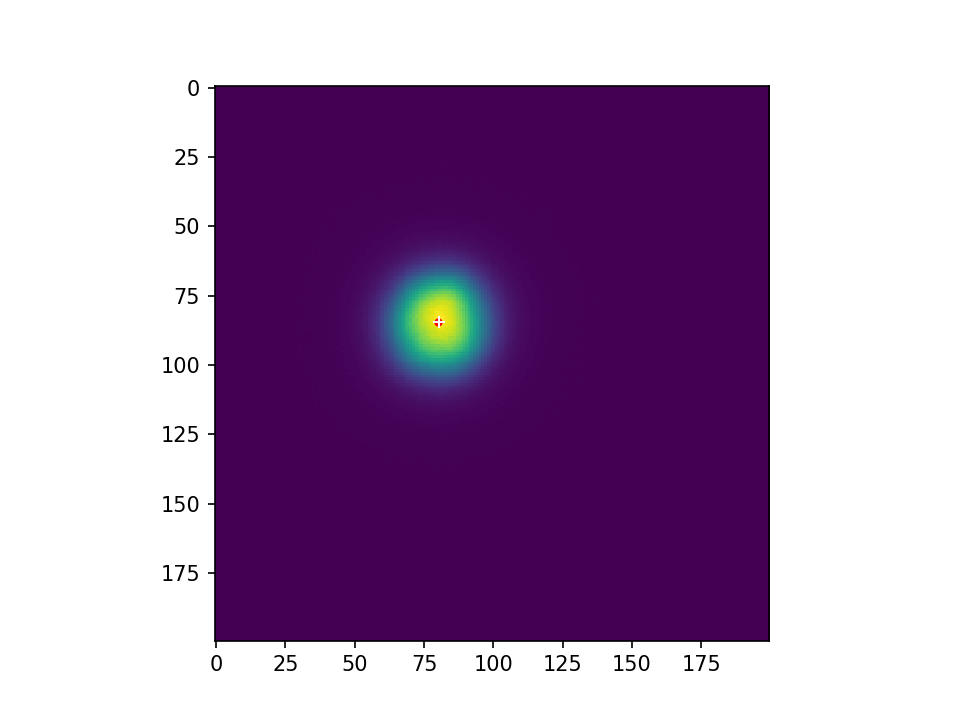

重み計算による中心: 680.1937679166226 784.5037730513633
2Dガウシアンによる中心: 680.4209999694197 784.6383716009997


In [5]:
%matplotlib notebook
#求めた"center of mass"を表示
plt.figure()
plt.imshow(cut_data)
plt.plot(xm, ym, color="red", marker=".")
plt.plot(xg, yg, color="white", marker="+")
print("重み計算による中心:",xm+x1,ym+y1)
print("2Dガウシアンによる中心:",xg+x1,yg+y1)